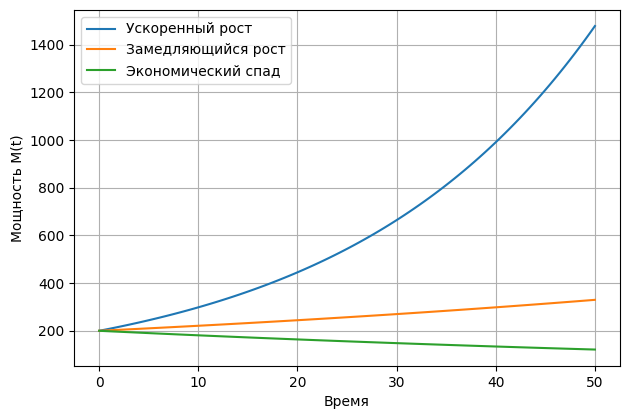

In [3]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.05  
beta = 0.03
gamma_accelerated = 0.07  
gamma_slow = 0.04 
gamma_decline = 0.02 
R0 = 100  
M0 = 200  
t = np.linspace(0, 50, 100)


def M(t, gamma):
    return M0 * np.exp((gamma - beta) * t)


def R(t):
    return R0 * np.exp(alpha * t)


def f(x):
    return np.minimum(x, 1)


M_accelerated = M(t, gamma_accelerated)
M_slow = M(t, gamma_slow)
M_decline = M(t, gamma_decline)


R_values = R(t)


x_accelerated = R_values / M_accelerated
x_slow = R_values / M_slow
x_decline = R_values / M_decline


Y_accelerated = M_accelerated * f(x_accelerated)
Y_slow = M_slow * f(x_slow)
Y_decline = M_decline * f(x_decline)


s = 0.2 
A_accelerated = s * Y_accelerated
A_slow = s * Y_slow
A_decline = s * Y_decline


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
plt.plot(t, M_accelerated, label="Ускоренный рост")
plt.plot(t, M_slow, label="Замедляющийся рост")
plt.plot(t, M_decline, label="Экономический спад")
plt.xlabel("Время")
plt.ylabel("Мощность M(t)")
plt.grid(True)
plt.legend()
'''
plt.subplot(2, 2, 2)
plt.plot(t, Y_accelerated, label="Ускоренный рост")
plt.plot(t, Y_slow, label="Замедляющийся рост")
plt.plot(t, Y_decline, label="Экономический спад")
plt.xlabel("Время")
plt.ylabel("Доход Y(t)")
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(t, A_accelerated, label="Ускоренный рост")
plt.plot(t, A_slow, label="Замедляющийся рост")
plt.plot(t, A_decline, label="Экономический спад")
plt.xlabel("Время")
plt.ylabel("Накопления A(t)")
plt.grid(True)
plt.legend()
'''
plt.tight_layout()
plt.show()


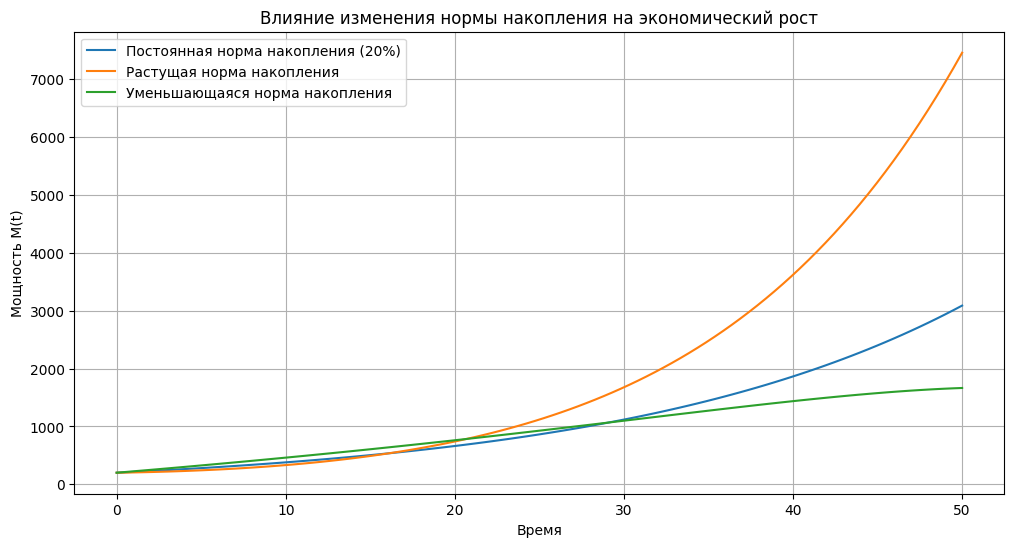

In [4]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.05 
gamma = 0.06 
beta = 0.03  
R0 = 100  
M0 = 200  
t = np.linspace(0, 50, 100)  


def f(x):
    return np.minimum(x, 1)

def R(t):
    return R0 * np.exp(alpha * t)

def A_constant(t, s=0.2):
    return s * np.ones_like(t)

def A_increasing(t):
    return 0.1 + 0.01 * t 

def A_decreasing(t):
    return 0.3 - 0.005 * t 


def M_with_savings(t, A_func):
    M = np.zeros_like(t)
    M[0] = M0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        Y = M[i-1] * f(R(t[i]) / M[i-1])
        M[i] = M[i-1] + dt * (A_func(t[i]) * Y - beta * M[i-1])
    return M

M_constant = M_with_savings(t, A_constant)
M_increasing = M_with_savings(t, A_increasing)
M_decreasing = M_with_savings(t, A_decreasing)

plt.figure(figsize=(12, 6))

plt.plot(t, M_constant, label="Постоянная норма накопления (20%)")
plt.plot(t, M_increasing, label="Растущая норма накопления")
plt.plot(t, M_decreasing, label="Уменьшающаяся норма накопления")
plt.xlabel("Время")
plt.ylabel("Мощность M(t)")
plt.title("Влияние изменения нормы накопления на экономический рост")
plt.grid(True)
plt.legend()

plt.show()
